# THE SPARKS FOUDATION

## DATA SCIENCE AND BUSINESS ANALYTICS (GRIP JUNE'21)

### #TASK 3

#### AUTHOR: SAKSHI YADUMOHAN SINGH

#### TASK NAME: Exploratory Data Analysis - Retail 

#### Objective: To find out the weak areas where one can work to make more profit. Understanding the business problems derived during the exploration of data.

Dataset : https://bit.ly/3i4rbWl


# Importing Libraries

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import *
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Understanding the Data

In [151]:
Store= pd.read_csv(r"C:\Users\saksh\Desktop\New folder\Documents\Downloads\SampleSuperstore.csv")
Store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [152]:
#Checking for the nun values
Store.isnull()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


In [153]:
#Summary of the Dataset(Getting familiarize)
Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [154]:
# Dimension of the Dataset
Store.shape

(9994, 13)

In [155]:
Store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Treatment of Duplicate data values

In [156]:
# Checking the duplicate values
Store.duplicated().sum()

17

In [157]:
# Dropping the duplicate values
Store.drop_duplicates(inplace=True)

In [158]:
# Finding the unique values
Store.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# Dropping the irrelevant Columns

In [159]:
# Removing Irrelevant Columns
drop =Store.drop(columns='Postal Code', axis=1, inplace =True)

In [160]:
Store

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


We remove the Postal Code data because its presence won't add any value to our visualization and exploration

# Visualization of the Data

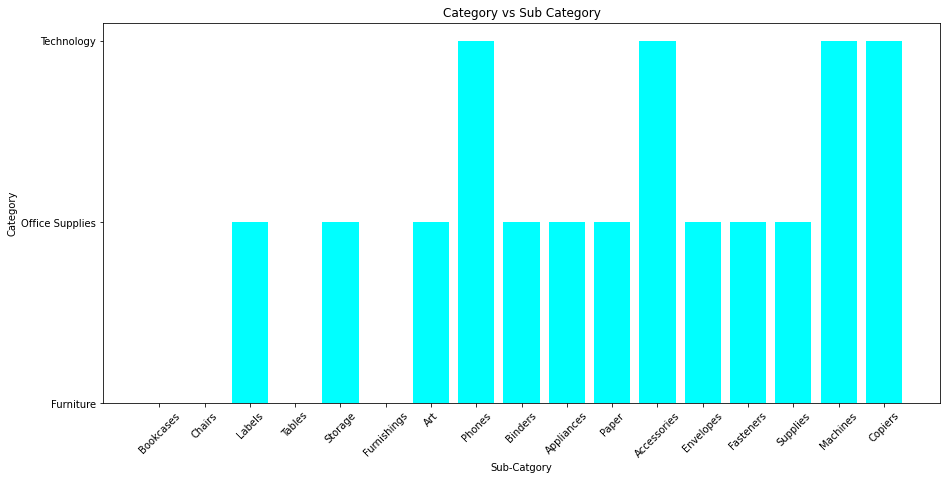

In [161]:
plt.figure(figsize=(15,7))
plt.bar('Sub-Category','Category', data=Store, color='cyan')
plt.title('Category vs Sub Category')
plt.xlabel('Sub-Catgory')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

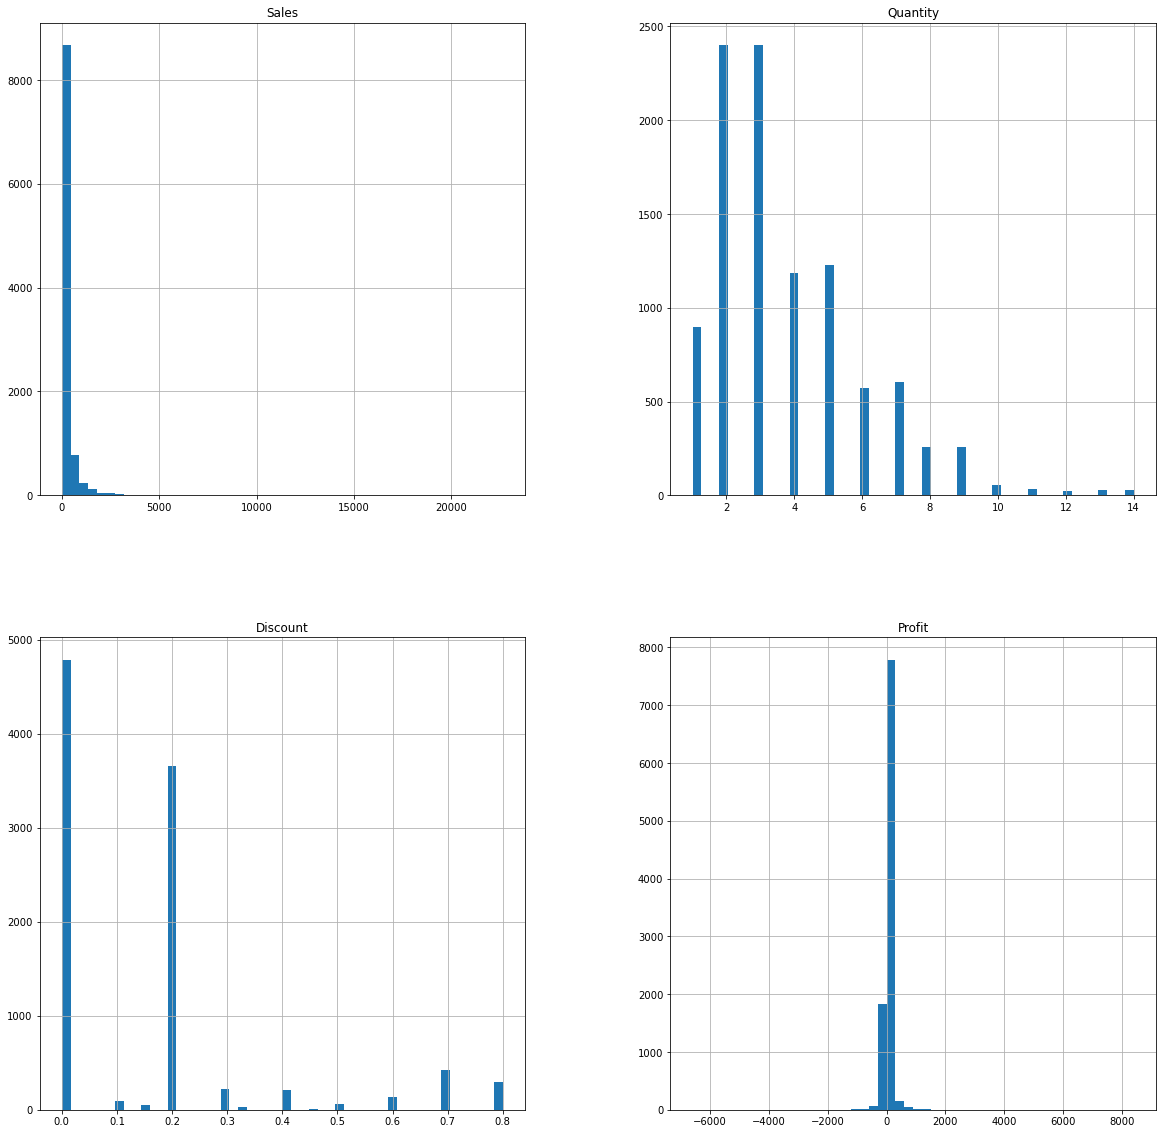

In [162]:
data.hist(bins=50,figsize=(20,20))
plt.show()

In [163]:
s=(Store['Segment'].value_counts()/len(Store['Segment'])*100)
s

Consumer       51.949484
Corporate      30.219505
Home Office    17.831011
Name: Segment, dtype: float64

<AxesSubplot:title={'center':'Segment'}>

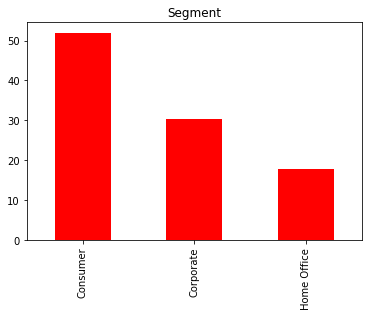

In [164]:
s.plot(kind='bar',color="red",title='Segment')

We can see that 50% people belongs to consumer class, 30% of people belongs to corplorate class and remaining 20% of people are from home office class

In [165]:
sh=(Store['Ship Mode'].value_counts()/len(Store['Ship Mode'])*100)
sh

Standard Class    59.687281
Second Class      19.474792
First Class       15.405432
Same Day           5.432495
Name: Ship Mode, dtype: float64

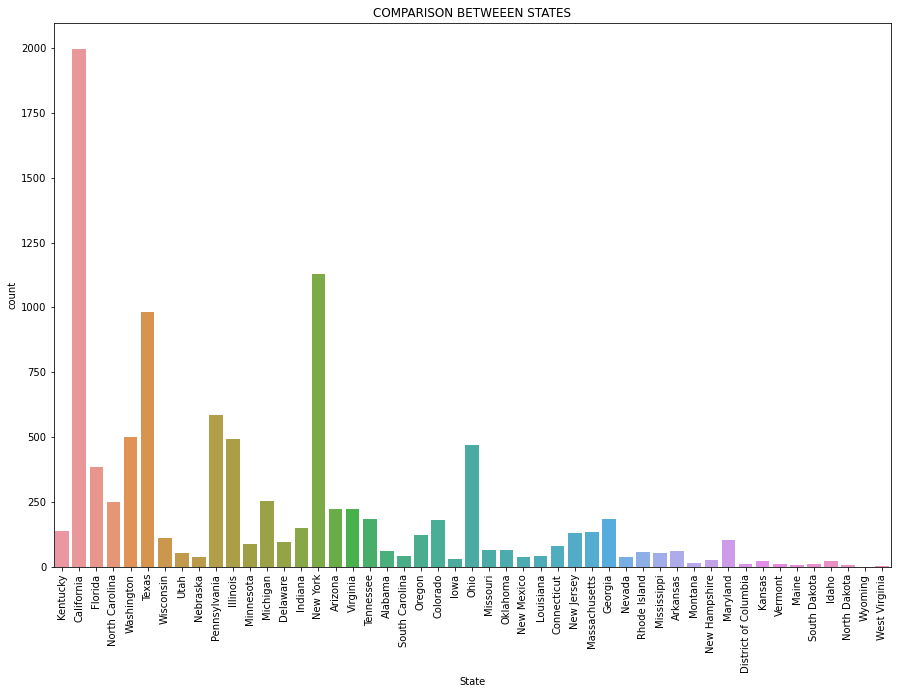

In [166]:
plt.figure(figsize=(15,10))
sns.countplot(x=Store['State'])
plt.title("COMPARISON BETWEEEN STATES")
plt.xticks(rotation=90)
plt.show()

In [167]:
c=(Store['Category'].value_counts()/len(Store['Category'])*100)
c

Office Supplies    60.258595
Furniture          21.228826
Technology         18.512579
Name: Category, dtype: float64

<AxesSubplot:title={'center':'Category'}>

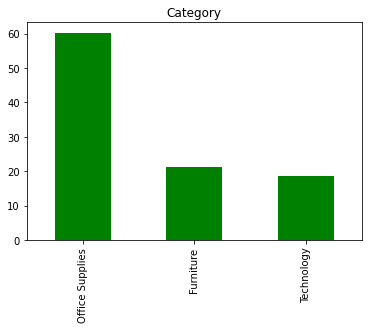

In [168]:
c.plot(kind='bar',color='green',title='Category')

We can see that nearly 60% belongs to Office supplies and approximately 20% belongs to each furniture and technology category

<function matplotlib.pyplot.show(close=None, block=None)>

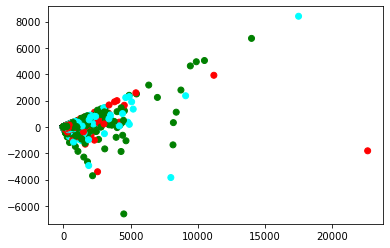

In [169]:
fig, ax=plt.subplots()
colors={'Consumer':'green','Corporate':'cyan','Home Office':'red'}
ax.scatter(Store['Sales'],Store['Profit'],c=Store['Segment'].apply(lambda x:colors[x]))
plt.show

We can say that consumer segment has more profit

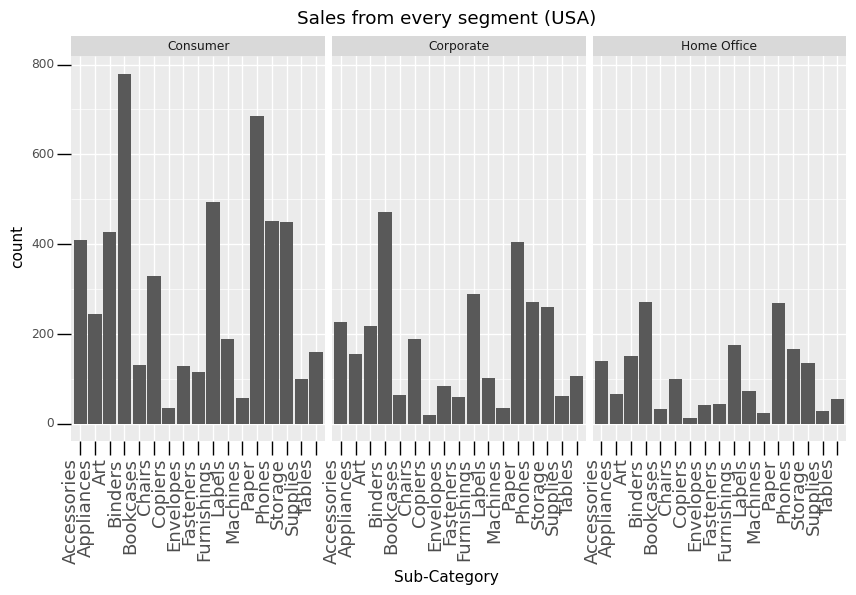

<ggplot: (171872459207)>

In [170]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                    axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(Store, aes(x='Sub-Category', fill='Sales'))+ geom_bar()+ facet_wrap(['Segment'])+flip_xlabels + theme(axis_text_x = element_text(size=13))+ggtitle("Sales from every segment (USA)"))

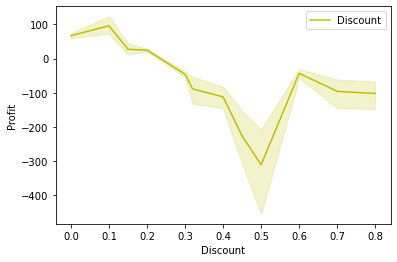

In [171]:
sns.lineplot('Discount','Profit', data=Store , color='y',label='Discount')
plt.legend()
plt.show()

<AxesSubplot:ylabel='Frequency'>

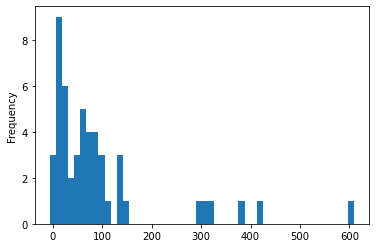

In [172]:
temp_data=data.loc[(Store['Segment']=='Consumer')&(Store['Discount']==0.1)]
temp_data['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

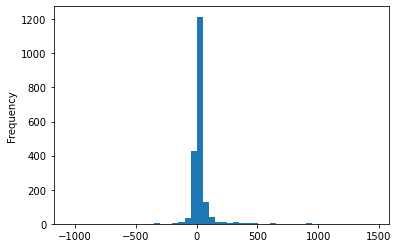

In [173]:
temp_data=Store.loc[(Store['Segment']=='Consumer')&(Store['Discount']==0.2)]
temp_data['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

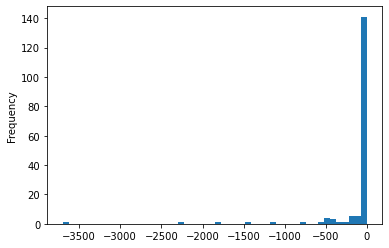

In [174]:
temp_data=Store.loc[(Store['Segment']=='Consumer')&(Store['Discount']==0.8)]
temp_data['Profit'].plot.hist(bins=50)

We can say that when superstore is offering discount less than 40% ,it is getting profit as depicted by above graphs and if discountsis greater than 50% like we have taken discount 80%,superstore is going loss.

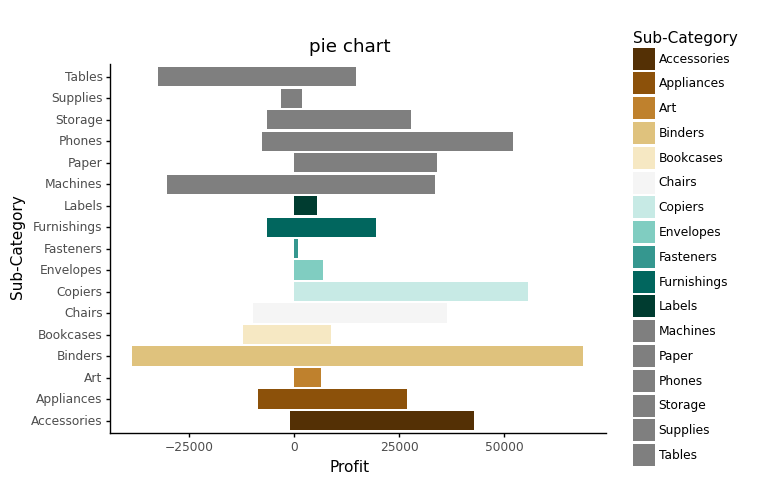

<ggplot: (171872327120)>

In [175]:
Profit_plot=(ggplot(Store, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', pelette='Spectral') + theme_classic() + ggtitle('pie chart'))
display(Profit_plot)

# Analysis of the Sales

In [176]:
def state_data_viewer(states):
    product_data = Store.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig,ax =plt.subplots(1, 3, figsize= (20,4))
        fig.suptitle(state, fontsize=14)
        ax_index =0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x=cat_data.Profit, y= cat_data.index, ax =ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index+=1
        
        fig.show()

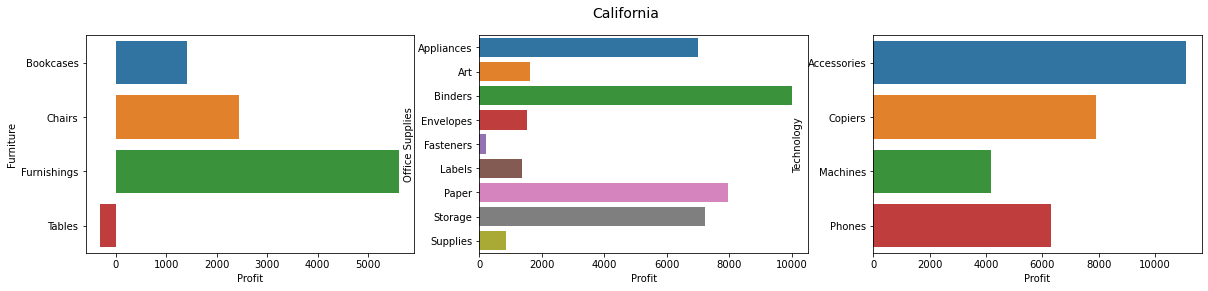

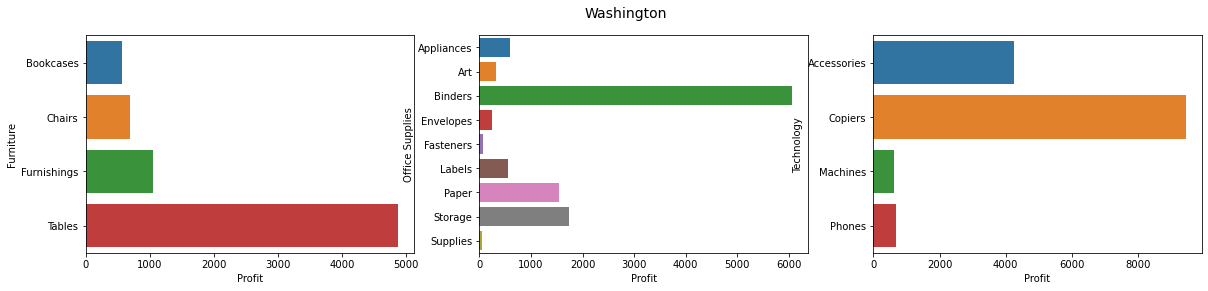

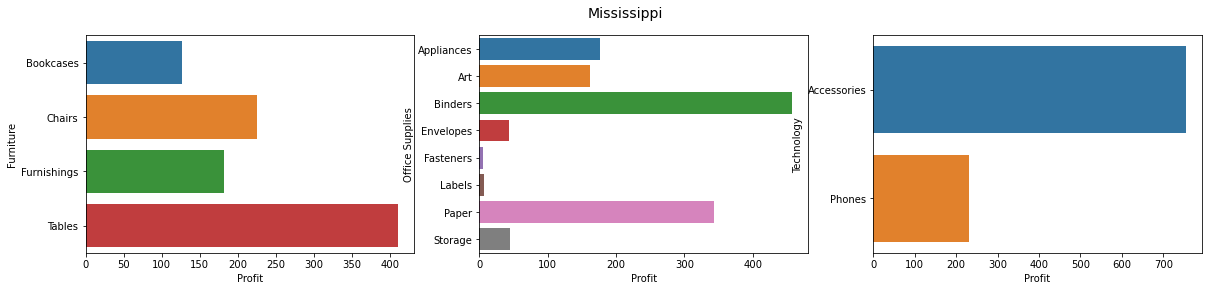

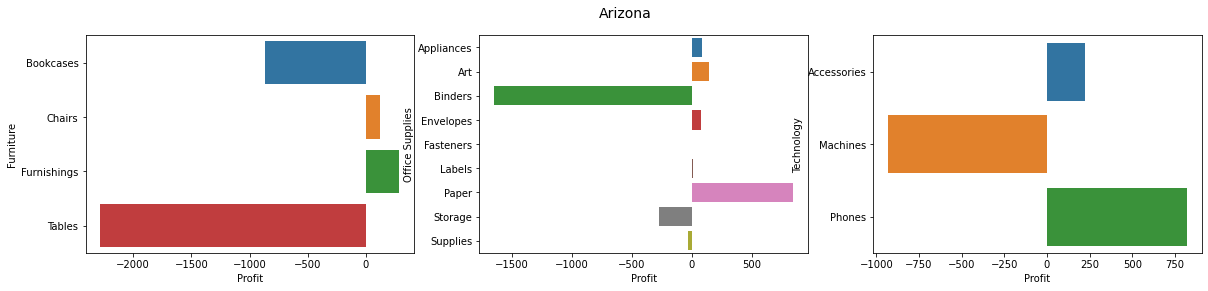

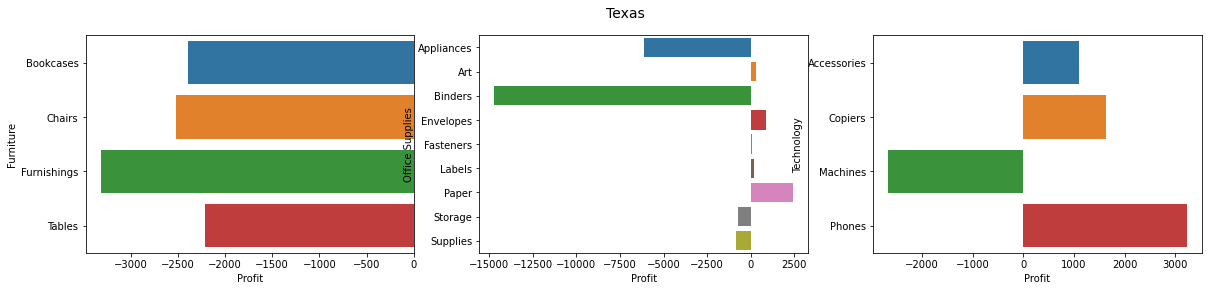

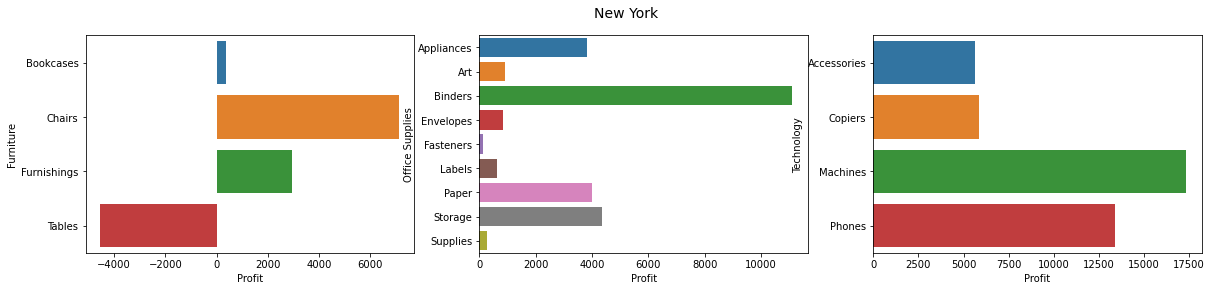

In [177]:
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas', 'New York']
state_data_viewer(states)

# Inference:
    From the above data visualization, we have seen the states and category where sale and profit are high and less. We can improve the profit in other states where there is low sale or profit by giving discount and various offers.

# Thankyou